In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [5]:
churn_data=pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

<AxesSubplot:title={'center':'Количество ушедших и лояльных клиентов'}, xlabel='Exited', ylabel='count'>

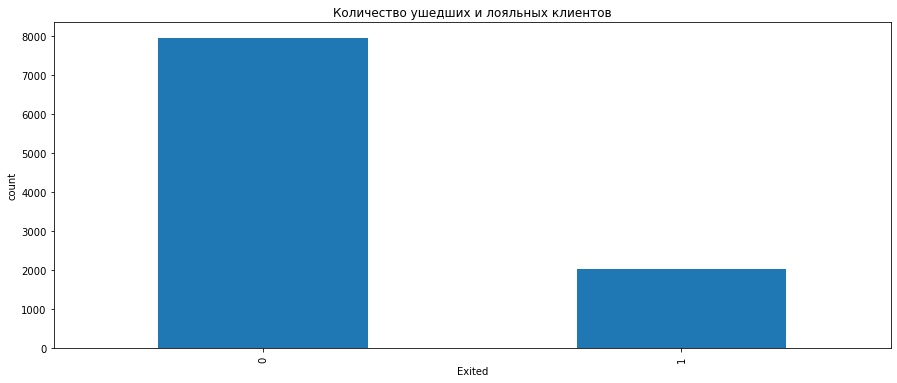

In [6]:
df=churn_data.groupby(by='Exited')['Exited'].count()
df.plot(
    kind='bar',
    figsize=(15, 6),
    title='Количество ушедших и лояльных клиентов',
    ylabel='count'
)

In [7]:
print(f'Cоотношение ушедших и лояльных клиентов {round(df[1]/df[0], 2)}')

Cоотношение ушедших и лояльных клиентов 0.26


Из графика видно, что количество ушедших клиентов составляет примерно четверть от лояльных 

#### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

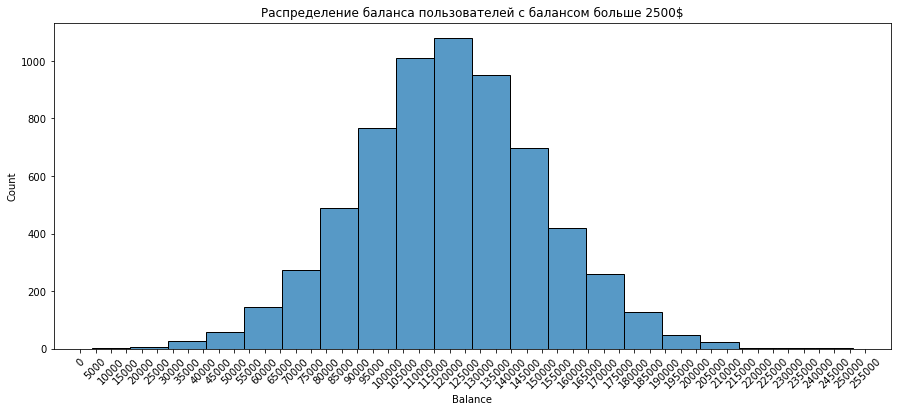

In [8]:
df=churn_data[churn_data['Balance']>2500]
fig=plt.figure(figsize=(15,6))
hist=sns.histplot(
    data=df,
    x='Balance',
    bins=20
)
hist.xaxis.set_tick_params(rotation=45)
#hist.grid()
hist.set_title('Распределение баланса пользователей с балансом больше 2500$')
hist.set_xticks(range(0,260000,5000));

Баланс расматриваемых пользователей находится в диапозоне от 3700 до 250000$, самая распространенная сумма порядка 120000$. Распределение напоминает нормальное.

#### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

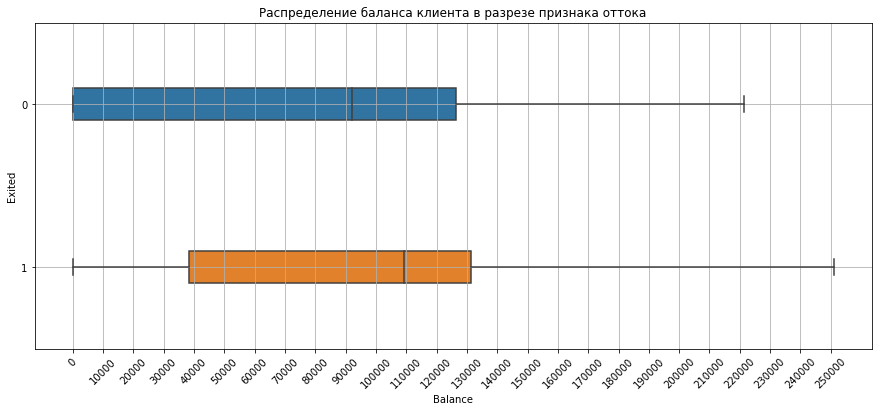

In [9]:
fig=plt.figure(figsize=(15,6))
box=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    width=0.2,
    orient='h'
)
box.xaxis.set_tick_params(rotation=45)
box.grid()
box.set_title('Распределение баланса клиента в разрезе признака оттока')
box.set_xticks(range(0,260000,10000));

Разброс сумм у ушедших клиентов меньше лояльных, медиана у ушедших также больше -порядка 110 тысяч, против 90 тысяч у лояльных клиентов. Возможно отток связан с тем, что условия для клиентов с таким балансом не выгодны для клиентов.

#### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

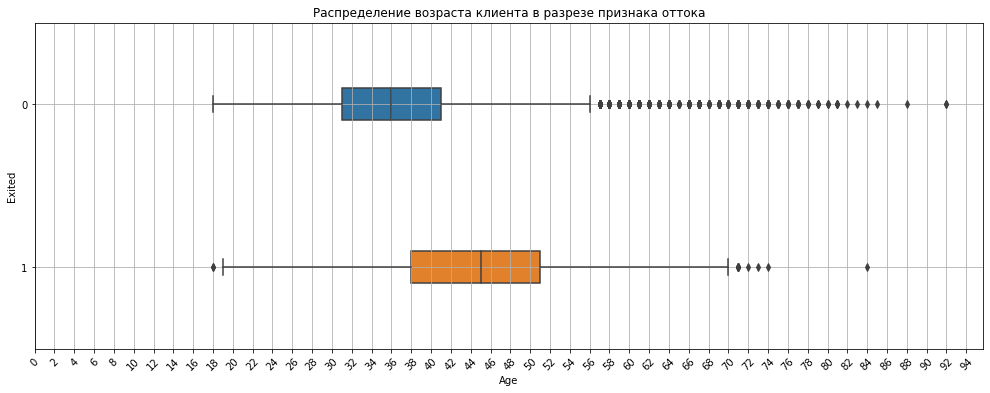

In [10]:
fig=plt.figure(figsize=(17,6))
box=sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    width=0.2,
    orient='h'
)
box.xaxis.set_tick_params(rotation=45)
box.grid()


box.set_title('Распределение возраста клиента в разрезе признака оттока')
box.set_xticks(range(0, 96, 2));

Из графика видно, что в груаае лояльных клиентов больше потенциальных вбросов.Для снижения отттоков клиентов банку слудует обратить внимание на возрастную категорию от 38 до 51 лет.

#### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [24]:
fig=px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    log_x=True,
    log_y=True,
    color='Exited',
    title='Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
)
fig.show()

Какой-либо зависимости между признаками не прослеживается. Ни в обычном, не в логорифмическом масштабе.

#### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [42]:
df=churn_data.groupby(by='Gender', as_index=False)['Exited'].mean()
df['Exited']=df['Exited']*100
pie=px.pie(
    data_frame=df,
    values="Exited",
    names='Gender',
    title='Отток клиентов по гендерному признаку',
    height=400,
    width=500
)
pie.show()

Чаще уходят женщины - 60% против 40% мужчин

#### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [88]:
df=churn_data
df['count']=df['Exited']
df=df.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['RowNumber'].count()
bar=px.bar(
    data_frame=df,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    width=550,
    height=450,
    title='Отток количества клиентов от числа приобретённых у банка услуг',
    text='Exited'
)
bar.show()

Самый минимальный оттток при использовании 2 продуктовБ далее с увеличением количества продуктов идет увеличение и оттока

#### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [121]:
df=churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['RowNumber'].count()
display(df)
bar=px.bar(
    data_frame=df,
    x='IsActiveMember',
    y='RowNumber',
    color='Exited',
    text='Exited',
    width=550,
    height=450
)
bar.show()

,IsActiveMember,Exited,RowNumber
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


In [119]:
df=churn_data.groupby(by=['IsActiveMember', 'Exited'], as_index=False)['RowNumber'].count()
df['IsActiveMember']=df['IsActiveMember'].apply(lambda x:"Active member" if x==1 else "No active")
df['Exited']=df['Exited'].apply(lambda x: 'exited' if x==1 else 'No exited')
fig=px.sunburst(
    data_frame=df,
    path=['IsActiveMember', 'Exited'],
    values='RowNumber',
    width=550,
    height=450
)
fig.show()

In [95]:
df.labels

AttributeError: 'DataFrame' object has no attribute 'labels'

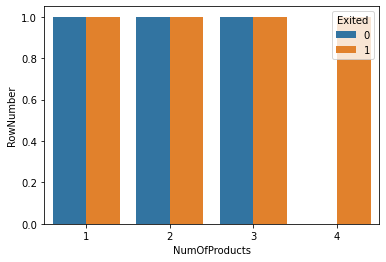

In [90]:
#9.7
f=churn_data
df['count']=df['Exited']
df=df.groupby(by=['NumOfProducts', 'Exited'], as_index=False)['RowNumber'].count()
barplot=sns.barplot(
    data=df,
    x='NumOfProducts',
    y='RowNumber',
    hue='Exited'
)

In [60]:
df

,NumOfProducts,Exited
0,1,0
1,1,1409
2,2,0
3,2,348
4,3,0
5,3,220
6,4,60


In [27]:
churn_data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [14]:
df['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

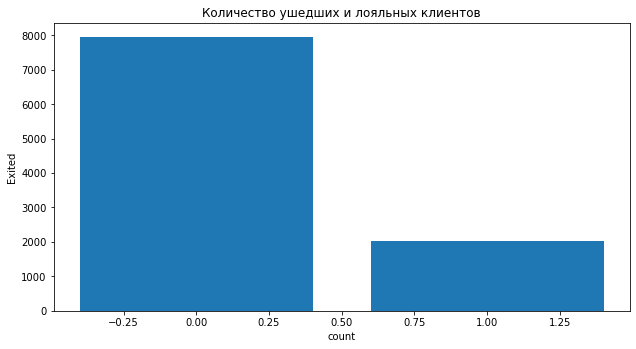

In [15]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_axes([0,0,1,1])
dt=churn_data.groupby(by='Exited')['Exited'].count()
ax.bar(
    x=dt.index,
    height=dt
)

ax.set_ylabel('Exited')
ax.set_xlabel('count')
ax.set_title('Количество ушедших и лояльных клиентов');


Text(0, 0.5, 'count')

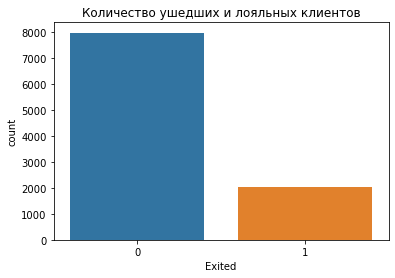

In [16]:
df=churn_data.groupby(by='Exited', as_index=False)['CustomerId'].count()
barplot=sns.barplot(
    data=df,
    x='Exited',
    y='CustomerId'
    )
barplot.set_title('Количество ушедших и лояльных клиентов')
barplot.set_ylabel('count')

In [17]:
df

,Exited,CustomerId
0,0,7963
1,1,2037


In [18]:
df=churn_data.groupby(by='Exited', as_index=False)['CustomerId'].count()
fig=px.bar(
    data_frame=df,
    x='Exited',
    y='CustomerId',
    color='Exited',
    text='CustomerId',
    height=500,
    width=1000,
    orientation='v',
    title='Количество ушедших и лояльных клиентов'
)

fig.show()

In [19]:
df

,Exited,CustomerId
0,0,7963
1,1,2037


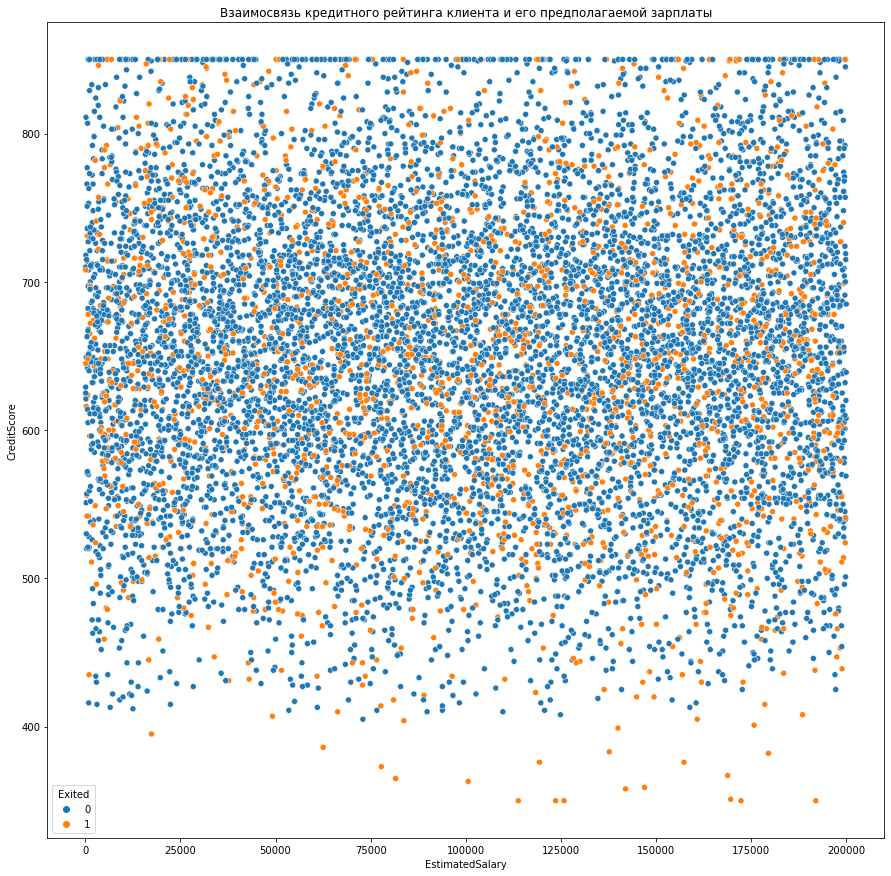

In [25]:
fig=plt.figure(figsize=(15,15))
scatter=sns.scatterplot(
    data=churn_data,
    x='EstimatedSalary',
    y="CreditScore",
    hue='Exited'
)
scatter.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты');